In [1]:
import pandas as pd
import pickle 

In [2]:
# Load the CSV file into a DataFrame
predictive_df = pd.read_csv('../data\predictive_df.csv')
filtered_df = pd.read_csv('../data\\filtered_df.csv')
target_column = filtered_df['ICU']

# Loading the correlations dictionary from the file
with open('../data//correlations.pkl', 'rb') as file:
    correlations = pickle.load(file)

In [3]:
target_column.head(5)

0    0
1    0
2    0
3    0
4    0
Name: ICU, dtype: int64

In [4]:
import numpy as np
import pandas as pd

# Create an empty DataFrame to store columns with nominal values
predictive_cat_df = pd.DataFrame()

# Iterate over the columns in the filtered dataframe
for column in predictive_df.columns:
    col_data = predictive_df[column]
    
    if set(col_data.dropna().unique()) == {0, 1}:
        predictive_cat_df[column] = col_data  # Add the column to the new DataFrame

In [5]:
predictive_cat_df.head(5)

,Sesso,Nazionalità,Domicilio,Profilassi,Comorbilità,Diabete,HIV,IRC,GCS,Prostrazione,...,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
3,1,0,0,0,1,1,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0


In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD

In [7]:
# Step 1: Compute Covariance Matrix
XCov = predictive_cat_df.cov()

In [8]:
# Step 2: Perform Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=3)  # Set the desired latent dimension to 3
svd.fit(XCov)
V = svd.components_  # Latent vectors
sigma_squared = svd.singular_values_**2  # Squared singular values

In [9]:
XCov.head(10)

,Sesso,Nazionalità,Domicilio,Profilassi,Comorbilità,Diabete,HIV,IRC,GCS,Prostrazione,...,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina
Sesso,0.229851,-0.010759,0.000587,0.009781,0.016236,-0.006847,-0.022692,5.477308e-03,-0.003717,-3.169014e-02,...,0.014671,0.017997,0.032668,2.112676e-02,0.001174,0.026800,-0.017801,0.023083,-0.012911,0.004890
Nazionalità,-0.010759,0.248631,0.018192,-0.016041,0.043232,0.022496,0.024257,1.017214e-02,-0.011933,3.169014e-02,...,0.004108,-0.000782,0.003326,-2.112676e-02,-0.005869,0.018584,0.016236,0.020736,0.008216,0.006064
Domicilio,0.000587,0.018192,0.040493,-0.001174,0.007629,-0.007629,-0.002347,-2.347418e-03,-0.002934,-3.521127e-03,...,-0.001761,-0.025822,-0.027582,-2.112676e-02,-0.003521,0.004108,-0.002934,-0.012911,-0.003521,-0.000587
Profilassi,0.009781,-0.016041,-0.001174,0.027387,-0.013693,-0.005086,-0.001565,-1.564945e-03,-0.001956,-7.042254e-03,...,-0.001174,-0.003130,-0.004304,-6.841163e-19,-0.002347,0.007433,-0.001956,0.005477,-0.002347,-0.000391
Comorbilità,0.016236,0.043232,0.007629,-0.013693,0.253326,0.094092,0.028951,2.895149e-02,-0.006064,1.056338e-02,...,-0.020540,0.036776,0.016236,7.042254e-03,0.001174,0.052621,0.008020,0.018388,0.043427,0.007238
Diabete,-0.006847,0.022496,-0.007629,-0.005086,0.094092,0.150039,-0.010172,1.799687e-02,0.001369,1.760563e-02,...,-0.007629,0.014867,0.007238,2.112676e-02,-0.001174,-0.000978,-0.012715,0.014476,0.012911,0.011541
HIV,-0.022692,0.024257,-0.002347,-0.001565,0.028951,-0.010172,0.053208,1.095462e-02,-0.003912,1.408451e-02,...,-0.002347,-0.006260,-0.008607,-1.408451e-02,0.009390,0.000782,0.010172,-0.003130,-0.004695,-0.000782
IRC,0.005477,0.010172,-0.002347,-0.001565,0.028951,0.017997,0.010955,5.320814e-02,-0.003912,-3.029658e-18,...,-0.002347,-0.006260,-0.008607,9.773090e-19,-0.004695,0.000782,0.010172,0.010955,-0.004695,-0.000782
GCS,-0.003717,-0.011933,-0.002934,-0.001956,-0.006064,0.001369,-0.003912,-3.912363e-03,0.065532,-3.873239e-02,...,-0.002934,-0.000782,-0.003717,-7.042254e-03,-0.005869,-0.016628,-0.004890,-0.007433,0.008216,-0.000978
Prostrazione,-0.031690,0.031690,-0.003521,-0.007042,0.010563,0.017606,0.014085,-3.029658e-18,-0.038732,1.901408e-01,...,0.010563,-0.014085,-0.003521,-1.408451e-02,0.021127,0.031690,-0.010563,0.021127,-0.007042,0.003521


In [10]:
sigma_squared

array([0.55129576, 0.17679891, 0.10986679])

In [11]:
V

array([[ 0.10843845, -0.01696565, -0.05838416, -0.00217126,  0.12424391,
         0.07382602, -0.0306956 ,  0.00812936, -0.01192349, -0.03084579,
         0.08241435,  0.00860716,  0.05555562, -0.14690129,  0.05339414,
        -0.00542955,  0.03950507, -0.12758454,  0.01348487, -0.02035011,
         0.02035011,  0.15753339, -0.03847533,  0.53268831,  0.49421297,
         0.51507218, -0.1426052 ,  0.15142018, -0.02400627,  0.20573068,
         0.04593318,  0.02035011],
       [-0.05233108,  0.48674644,  0.04151872, -0.04920957,  0.48954158,
         0.25130254,  0.09830978,  0.04382672, -0.09315895,  0.32967013,
        -0.19357196,  0.02426032, -0.01978462, -0.06918793, -0.10722805,
        -0.07006155, -0.071231  , -0.16868092, -0.25583443, -0.03390293,
         0.03390293, -0.17398101,  0.00509956, -0.03157829, -0.02647874,
        -0.14309749,  0.04671801,  0.22670553,  0.04482662,  0.21067125,
         0.09966428,  0.03390293],
       [ 0.09847905, -0.06578081,  0.01407081,  0.0411

In [12]:
# Step 3: Encode the First Sample
first_sample = predictive_cat_df.iloc[4]  # Assuming the first sample is at index 0

# Multiply the transformed sample by the matrix V to obtain latent vectors
latent_vectors = np.dot(first_sample, V.T)

# Print the encoded latent vectors
print("Encoded Latent Vectors:")
print(latent_vectors)


Encoded Latent Vectors:
[ 1.67567596 -0.17812644 -0.04522591]


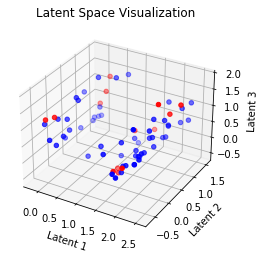

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Loop through the DataFrame and calculate latent vectors
latent_vectors_list = []
colors = []  # To store the colors for the scatter plot

for i in range(len(predictive_cat_df)):
    sample = predictive_cat_df.iloc[i]
    latent_vector = np.dot(sample, V.T)
    latent_vectors_list.append(latent_vector)
    
    if i in filtered_df.index and filtered_df.loc[i, 'ICU'] == 1:
        colors.append('red')  # Corresponding sample in filtered_df has 'ICU' value set to 1
    else:
        colors.append('blue')  # Corresponding sample in filtered_df does not have 'ICU' value set to 1

# Convert the list of latent vectors into a NumPy array
latent_vectors = np.array(latent_vectors_list)

# Plot the latent vectors in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

if len(latent_vectors[0]) != 3 : 
    print("This 3D reprensentation is incorrect, vector size != 3")
# Plot all latent vectors
ax.scatter(latent_vectors[:, 0], latent_vectors[:, 1], latent_vectors[:, 2], color=colors)

# Set labels and title for the plot
ax.set_xlabel('Latent 1')
ax.set_ylabel('Latent 2')
ax.set_zlabel('Latent 3')
ax.set_title('Latent Space Visualization')

# Show the plot
plt.show()


***Then we should merge this with the numerical datas***

In [14]:
import pandas as pd

# Create a new DataFrame with latent vectors
latent_df = pd.DataFrame(latent_vectors, columns=[f'latent_{i+1}' for i in range(latent_vectors.shape[1])])

# Get the remaining features from predictive_df
remaining_features_df = predictive_df.drop(predictive_cat_df.columns, axis=1)

# Merge latent_df with the remaining features
merged_df = pd.concat([latent_df, remaining_features_df], axis=1)

In [15]:
merged_df.head(5)

,latent_1,latent_2,latent_3,Età,Altezza,Peso,Numerocriteri,Parassitemiavaloreassoluto,Percentualeparassitemia,Ritardoterapeutico,...,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,DurataArtesunato
0,-0.102328,0.776901,-0.002133,57,160,55.0,1,117137,1.0,7,...,0.475355,136,3.4,8.400000,1.15,498,7.488156,29.354149,1.961553,2
1,-0.193801,0.342485,-0.034832,62,159,70.0,1,37694,1.0,7,...,0.779619,140,3.9,9.400000,1.19,469,7.471427,29.661985,2.386043,4
2,1.994253,-0.165400,0.305186,72,175,83.0,1,7,0.2,2,...,0.360000,139,4.0,8.130000,1.10,369,7.410000,30.400000,2.600000,1
3,2.052544,-0.083588,0.406235,53,177,96.0,2,572000,12.0,7,...,1.020000,122,3.5,8.520905,1.10,407,7.459404,25.057969,2.728105,4
4,1.675676,-0.178126,-0.045226,58,160,64.3,1,602100,13.5,7,...,1.428358,135,3.9,8.849885,1.10,455,7.460937,26.638637,2.363897,1


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the features in merged_df
normalized_df = pd.DataFrame(scaler.fit_transform(merged_df), columns=merged_df.columns)

In [17]:
normalized_df.head(5)

,latent_1,latent_2,latent_3,Età,Altezza,Peso,Numerocriteri,Parassitemiavaloreassoluto,Percentualeparassitemia,Ritardoterapeutico,...,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,DurataArtesunato
0,0.033326,0.657854,0.228539,0.587302,0.250,0.190141,0.0,0.104116,0.045411,0.461538,...,0.023170,0.56,0.296296,0.404762,0.234234,0.505777,0.783983,0.932958,0.352311,0.166667
1,0.000000,0.461345,0.215166,0.666667,0.225,0.366197,0.0,0.033500,0.045411,0.461538,...,0.041952,0.72,0.481481,0.642857,0.270270,0.468549,0.714281,0.952691,0.437209,0.500000
2,0.797172,0.231601,0.354229,0.825397,0.625,0.518779,0.0,0.000000,0.009046,0.076923,...,0.016049,0.68,0.518519,0.340476,0.189189,0.340180,0.458333,1.000000,0.480000,0.000000
3,0.818409,0.268609,0.395557,0.523810,0.675,0.671362,0.2,0.508441,0.545434,0.461538,...,0.056790,0.00,0.333333,0.433549,0.189189,0.388960,0.664185,0.657562,0.505621,0.500000
4,0.681105,0.225845,0.210915,0.603175,0.250,0.299296,0.0,0.535197,0.613619,0.461538,...,0.081997,0.52,0.481481,0.511877,0.189189,0.450578,0.670569,0.758887,0.432779,0.000000


***The problem is that the further we go from the original datas, the less informations for the doctors***

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self, input_dim, embedded_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, embedded_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
    def loss(self, distance_matrix, targets, lambda_reg = 10.0):

        pospos_sum_dist = 0
        pospos_sum_count = 0

        posneg_sum_dist = 0
        posneg_sum_count = 0
        
        negneg_sum_dist = 0
        negneg_sum_count = 0

        # print(distance_matrix)

        max_dist = torch.max(distance_matrix)

        for i in range(len(distance_matrix)) : 
            for j in range(i+1, len(distance_matrix)) : 
                if targets[i] == 1 or targets[j] == 1 : 
                    if targets[i] == 1 and targets[j] == 1 : #pos pos
                        pospos_sum_dist += distance_matrix[i][j]
                        pospos_sum_count += 1 
                    else : # pos/neg ou neg/pos
                        posneg_sum_dist += distance_matrix[i][j]
                        posneg_sum_count += 1 
                else :
                    negneg_sum_dist += distance_matrix[i][j]  
                    negneg_sum_count += 1  
        
        avg_pospos = pospos_sum_dist/pospos_sum_count
        avg_negneg = negneg_sum_dist/negneg_sum_count
        avg_posneg = posneg_sum_dist/posneg_sum_count

        # avg pos pos + avg neg neg - avg pos neg + max dist (so it stays positive)
        distance_loss = (avg_pospos + avg_negneg) / (2*avg_posneg)
        
        regularization_loss = 0
        for param in self.parameters():
            regularization_loss += torch.sum(torch.square(param))

        # print('distance_loss ='+str(distance_loss))
        # print('lambda_reg * regularization_loss ='+str(lambda_reg * regularization_loss))
        return distance_loss + lambda_reg * regularization_loss

# Set the input and embedded dimensions
input_dim = normalized_df.shape[1]
embedded_dim = 3

# Create an instance of the network
model = Net(input_dim, embedded_dim)


In [19]:
import torch
from torch.utils.data import Dataset, DataLoader

# Custom dataset class
class MyDataset(Dataset):
    def __init__(self, dataframe, target_column):
        self.data = torch.tensor(dataframe.values, dtype=torch.float32)
        self.targets = torch.tensor(target_column.values, dtype=torch.float32)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]
    

# Create an instance of your custom dataset
dataset = MyDataset(normalized_df, target_column)

# Define the batch size
batch_size = len(normalized_df)

# Create the data loader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)


In [20]:
import torch.optim.lr_scheduler as lr_scheduler
import torch
import torch.nn as nn
import torch.optim as optim

In [21]:
# Convert the normalized_df dataframe to a PyTorch tensor
data = torch.tensor(normalized_df.values, dtype=torch.float32)

targets = torch.tensor(target_column.values, dtype=torch.float32)


In [22]:
# Convert the normalized_df dataframe to a PyTorch tensor
data2 = torch.tensor(predictive_df.values, dtype=torch.float32)

targets = torch.tensor(target_column.values, dtype=torch.float32)


In [23]:
# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Define the learning rate scheduler
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

# Training loop
epochs = 250
for epoch in range(epochs):

    # Compute les embeddings

    # Create an empty tensor to store the embeddings
    embeddings = torch.empty((data.shape[0], embedded_dim))

    total_loss = 0

    for i in range(data.shape[0]):
        sample = data[i]
        embedded_sample = model(sample)
        embeddings[i] = embedded_sample

    distance_matrix = torch.cdist(embeddings, embeddings, p=2)

    optimizer.zero_grad()
    
    # Compute la matrice de distance 

    loss = model.loss(distance_matrix, targets) 
    loss.backward()
    total_loss += loss.item()
    optimizer.step()

    # Update the learning rate based on the validation loss
    val_loss = total_loss / data.shape[0]
    scheduler.step(val_loss)
    print('epoch : '+str(epoch)+' loss : '+str(val_loss))


epoch : 0 loss : 5.358489142523871
epoch : 1 loss : 4.385529412163629
epoch : 2 loss : 3.544623057047526
epoch : 3 loss : 2.8297381930881076
epoch : 4 loss : 2.2304130130343967
epoch : 5 loss : 1.7350179884168837
epoch : 6 loss : 1.3325634002685547
epoch : 7 loss : 1.0125274658203125
epoch : 8 loss : 0.7630389001634386
epoch : 9 loss : 0.5722878774007162
epoch : 10 loss : 0.4329656759897868
epoch : 11 loss : 0.3337219821082221
epoch : 12 loss : 0.2661481963263618
epoch : 13 loss : 0.2251842286851671
epoch : 14 loss : 0.20333295398288304
epoch : 15 loss : 0.1921767791112264
epoch : 16 loss : 0.1910071505440606
epoch : 17 loss : 0.1935816076066759
epoch : 18 loss : 0.1982285049226549
epoch : 19 loss : 0.20211700598398843
epoch : 20 loss : 0.2048277325100369
epoch : 21 loss : 0.20297156439887154
epoch : 22 loss : 0.19944564501444498
epoch : 23 loss : 0.19275236129760742
epoch : 24 loss : 0.18373416529761422
epoch : 25 loss : 0.17192716068691677
epoch : 26 loss : 0.1604580216937595
epoch :

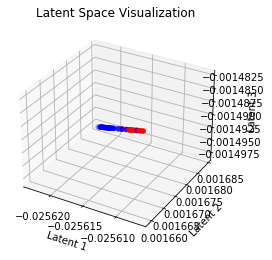

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Encode the data using the trained model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    # Create an empty tensor to store the embeddings
    embeddings = torch.empty((data.shape[0], embedded_dim))

    total_loss = 0

    for i in range(data.shape[0]):
        sample = data[i]
        embedded_sample = model(sample)
        embeddings[i] = embedded_sample

colors = []
for i in range(len(normalized_df)):
    if target_column[i] == 1:
        colors.append('red')  # Corresponding sample in filtered_df has 'ICU' value set to 1
    else:
        colors.append('blue')  # Corresponding sample in filtered_df does not have 'ICU' value set to 1

# Convert the embeddings tensor to a NumPy array
latent_vectors = embeddings.numpy()

# print(latent_vectors)

# Step 2: Plot the latent vectors in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all latent vectors
ax.scatter(latent_vectors[:, 0], latent_vectors[:, 1], latent_vectors[:, 2], color=colors)

# Set labels and title for the plot
ax.set_xlabel('Latent 1')
ax.set_ylabel('Latent 2')
ax.set_zlabel('Latent 3')
ax.set_title('Latent Space Visualization')

# Show the plot
plt.show()


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Step 1: Encode the data using the trained model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    # Create an empty tensor to store the embeddings
    embeddings = torch.empty((data.shape[0], embedded_dim))

    total_loss = 0

    for i in range(data.shape[0]):
        sample = data[i]
        embedded_sample = model(sample)
        embeddings[i] = embedded_sample

colors = []
for i in range(len(normalized_df)):
    if target_column[i] == 1:
        colors.append('red')  # Corresponding sample in filtered_df has 'ICU' value set to 1
    else:
        colors.append('blue')  # Corresponding sample in filtered_df does not have 'ICU' value set to 1

# Convert the embeddings tensor to a NumPy array
latent_vectors = embeddings.numpy()

# Step 2: Create a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=latent_vectors[:, 0],
    y=latent_vectors[:, 1],
    z=latent_vectors[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color=colors,
        opacity=0.8
    )
)])

# Set the layout for the plot
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Latent 1'),
        yaxis=dict(title='Latent 2'),
        zaxis=dict(title='Latent 3')
    ),
    title='Latent Space Visualization'
)

# Display the plot
fig.show()

# Save the plot as an HTML file
fig.write_html('visualization.html')


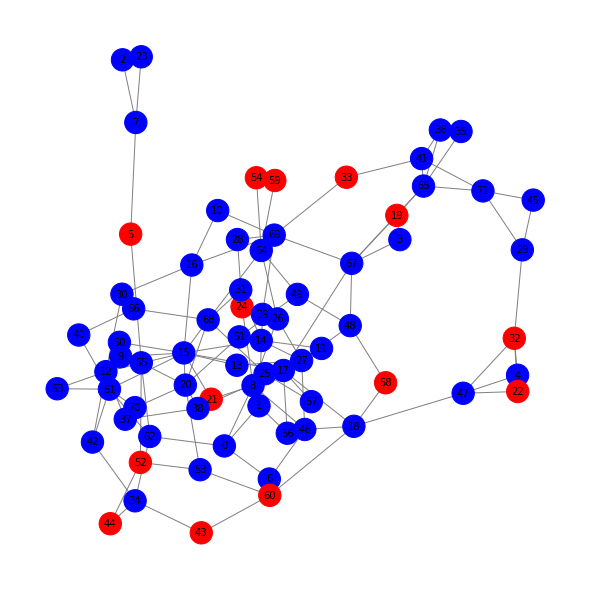

In [26]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'
# Assuming the filtered dataset with the "ICU" feature is stored in a DataFrame called 'filtered_df'
# Assuming the correlations are stored in a dictionary called 'correlations_dict'

# Compute weighted distance between two samples in the DataFrame
def compute_distance(df, index1, index2):
    sample1 = df.iloc[index1].values
    sample2 = df.iloc[index2].values
    weighted_distance = 0
    
    for i in range(len(sample1)):
        weighted_distance += abs(sample1[i] - sample2[i])
    
    return weighted_distance

# Step 1: Find pairwise weighted distances
dist_matrix = np.zeros((normalized_df.shape[0], normalized_df.shape[0]))

for i in range(normalized_df.shape[0]):
    for j in range(i + 1, normalized_df.shape[0]):
        weighted_dist = compute_distance(normalized_df, i, j)
        dist_matrix[i, j] = weighted_dist
        dist_matrix[j, i] = weighted_dist

# Check distances set to 0 outside diagonal
# for i in range(dist_matrix.shape[0]):
#     for j in range(dist_matrix.shape[1]):
#         if i != j and dist_matrix[i, j] == 0:
#             print(f"Distance between points {i} and {j} is set to 0.")


# Step 2: Find k nearest neighbors for each sample
k = 2  # Number of nearest neighbors
n_neighbors = []

for i in range(dist_matrix.shape[0]):
    neighbors = np.argsort(dist_matrix[i])
    
    # Find neighbors with distance equal to 0
    zero_distance_neighbors = [neighbor for neighbor in neighbors if dist_matrix[i, neighbor] == 0]
    
    # Find additional nearest neighbors with distance > 0
    additional_neighbors = [neighbor for neighbor in neighbors if dist_matrix[i, neighbor] > 0][:k]
    
    neighbors_list = zero_distance_neighbors + additional_neighbors
    n_neighbors.append(neighbors_list)

# nearest_neighbors = np.argsort(dist_matrix, axis=1)[:, 1:(k+1)]


# print(nearest_neighbors)

# Step 3: Create graph and add edges
graph = nx.Graph()
for i, neighbors in enumerate(n_neighbors):
    for neighbor in neighbors:
        if (i != neighbor) :
            graph.add_edge(i, neighbor)

# Step 4: Add nodes with color based on 'ICU' feature
for i in range(filtered_df.shape[0]):
    icu_value = filtered_df.iloc[i]['ICU']
    color = 'red' if icu_value == 1 else 'blue'
    graph.add_node(i, color=color)

# Step 5: Plot the graph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(graph)
node_colors = [graph.nodes[node]['color'] for node in graph.nodes]
nx.draw(graph, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, edge_color='gray')
plt.axis("off")
plt.show()


***Comparison with initial database***

In [27]:
# Set the input and embedded dimensions
input_dim2 = predictive_df.shape[1]
embedded_dim2 = 3

# Create an instance of the network
model2 = Net(input_dim2, embedded_dim2)

In [28]:
# # Define the loss function
# def model_loss(distance_matrix, targets, lambda_reg = 10.0):

#     pospos_sum_dist = 0
#     pospos_sum_count = 0

#     posneg_sum_dist = 0
#     posneg_sum_count = 0
    
#     negneg_sum_dist = 0
#     negneg_sum_count = 0

#     # print(distance_matrix)

#     max_dist = torch.max(distance_matrix)

#     for i in range(len(distance_matrix)) : 
#         for j in range(i+1, len(distance_matrix)) : 
#             if targets[i] == 1 or targets[j] == 1 : 
#                 if targets[i] == 1 and targets[j] == 1 : #pos pos
#                     pospos_sum_dist += distance_matrix[i][j]
#                     pospos_sum_count += 1 
#                 else : # pos/neg ou neg/pos
#                     posneg_sum_dist += distance_matrix[i][j]
#                     posneg_sum_count += 1 
#             else :
#                 negneg_sum_dist += distance_matrix[i][j]  
#                 negneg_sum_count += 1  
    
#     avg_pospos = pospos_sum_dist/pospos_sum_count
#     avg_negneg = negneg_sum_dist/negneg_sum_count
#     avg_posneg = posneg_sum_dist/posneg_sum_count

#     # avg pos pos + avg neg neg - avg pos neg + max dist (so it stays positive)
#     distance_loss = (avg_pospos + avg_negneg) / (2*avg_posneg)
    
#     regularization_loss = 0
#     for param in model2.parameters():
#         regularization_loss += torch.sum(torch.square(param))

#     # print('distance_loss ='+str(distance_loss))
#     # print('lambda_reg * regularization_loss ='+str(lambda_reg * regularization_loss))
#     return distance_loss + lambda_reg * regularization_loss

In [29]:
# Define the optimizer
optimizer = optim.Adam(model2.parameters(), lr=0.01)

# Define the learning rate scheduler
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

# Training loop
epochs = 250
for epoch in range(epochs):

    # Compute les embeddings

    # Create an empty tensor to store the embeddings
    embeddings = torch.empty((data2.shape[0], embedded_dim))

    total_loss = 0

    for i in range(data2.shape[0]):
        sample = data2[i]
        embedded_sample = model2(sample)
        embeddings[i] = embedded_sample

    distance_matrix = torch.cdist(embeddings, embeddings, p=2)

    optimizer.zero_grad()
    
    # Compute la matrice de distance 

    loss = model2.loss(distance_matrix, targets) 
    loss.backward()
    total_loss += loss.item()
    optimizer.step()

    # Update the learning rate based on the validation loss
    val_loss = total_loss / data2.shape[0]
    scheduler.step(val_loss)
    print('epoch : '+str(epoch)+' loss : '+str(val_loss))


epoch : 0 loss : 5.347757975260417
epoch : 1 loss : 4.218629201253255
epoch : 2 loss : 3.268060472276476
epoch : 3 loss : 2.486259036593967
epoch : 4 loss : 1.856039047241211
epoch : 5 loss : 1.3587219450208876
epoch : 6 loss : 0.9776579538981119
epoch : 7 loss : 0.6965986887613932
epoch : 8 loss : 0.49851258595784503
epoch : 9 loss : 0.3669416904449463
epoch : 10 loss : 0.28704725371466744
epoch : 11 loss : 0.24580208460489908
epoch : 12 loss : 0.23228496975368923
epoch : 13 loss : 0.2360786067114936
epoch : 14 loss : 0.2489702966478136
epoch : 15 loss : 0.2645404603746202
epoch : 16 loss : 0.2782364421420627
epoch : 17 loss : 0.2875000370873345
epoch : 18 loss : 0.290557066599528
epoch : 19 loss : 0.28675492604573566
epoch : 20 loss : 0.27637259165445965
epoch : 21 loss : 0.2605645391676161
epoch : 22 loss : 0.24031562275356716
epoch : 23 loss : 0.21695906586117214
epoch : 24 loss : 0.19345596101548937
epoch : 25 loss : 0.16900339391496447
epoch : 26 loss : 0.14614767498440212
epoch 

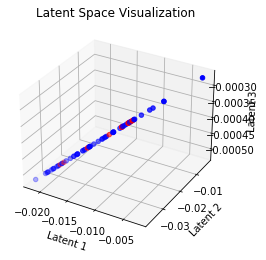

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Encode the data using the trained model
model2.eval()  # Set the model to evaluation mode
with torch.no_grad():
    # Create an empty tensor to store the embeddings
    embeddings = torch.empty((data2.shape[0], embedded_dim))

    total_loss = 0

    for i in range(data2.shape[0]):
        sample = data2[i]
        embedded_sample = model2(sample)
        embeddings[i] = embedded_sample

colors = []
for i in range(len(normalized_df)):
    if target_column[i] == 1:
        colors.append('red')  # Corresponding sample in filtered_df has 'ICU' value set to 1
    else:
        colors.append('blue')  # Corresponding sample in filtered_df does not have 'ICU' value set to 1

# Convert the embeddings tensor to a NumPy array
latent_vectors = embeddings.numpy()

# print(latent_vectors)

# Step 2: Plot the latent vectors in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all latent vectors
ax.scatter(latent_vectors[:, 0], latent_vectors[:, 1], latent_vectors[:, 2], color=colors)

# Set labels and title for the plot
ax.set_xlabel('Latent 1')
ax.set_ylabel('Latent 2')
ax.set_zlabel('Latent 3')
ax.set_title('Latent Space Visualization')

# Show the plot
plt.show()


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Step 1: Encode the data using the trained model
model2.eval()  # Set the model to evaluation mode
with torch.no_grad():
    # Create an empty tensor to store the embeddings
    embeddings = torch.empty((data2.shape[0], embedded_dim))

    total_loss = 0

    for i in range(data2.shape[0]):
        sample = data2[i]
        embedded_sample = model2(sample)
        embeddings[i] = embedded_sample

colors = []
for i in range(len(normalized_df)):
    if target_column[i] == 1:
        colors.append('red')  # Corresponding sample in filtered_df has 'ICU' value set to 1
    else:
        colors.append('blue')  # Corresponding sample in filtered_df does not have 'ICU' value set to 1

# Convert the embeddings tensor to a NumPy array
latent_vectors = embeddings.numpy()

# Step 2: Create a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=latent_vectors[:, 0],
    y=latent_vectors[:, 1],
    z=latent_vectors[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color=colors,
        opacity=0.8
    )
)])

# Set the layout for the plot
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Latent 1'),
        yaxis=dict(title='Latent 2'),
        zaxis=dict(title='Latent 3')
    ),
    title='Latent Space Visualization'
)

# Display the plot
fig.show()

# Save the plot as an HTML file
fig.write_html('visualizationBAD.html')

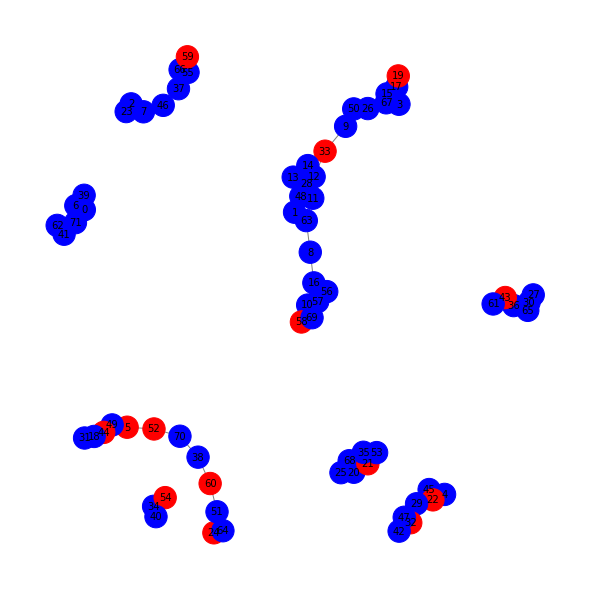

In [32]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'
# Assuming the filtered dataset with the "ICU" feature is stored in a DataFrame called 'filtered_df'
# Assuming the correlations are stored in a dictionary called 'correlations_dict'

# Compute weighted distance between two samples in the DataFrame
def compute_distance(df, index1, index2):
    sample1 = df.iloc[index1].values
    sample2 = df.iloc[index2].values
    weighted_distance = 0
    
    for i in range(len(sample1)):
        weighted_distance += abs(sample1[i] - sample2[i])
    
    return weighted_distance

# Step 1: Find pairwise weighted distances
dist_matrix = np.zeros((predictive_df.shape[0], predictive_df.shape[0]))

for i in range(predictive_df.shape[0]):
    for j in range(i + 1, predictive_df.shape[0]):
        weighted_dist = compute_distance(predictive_df, i, j)
        dist_matrix[i, j] = weighted_dist
        dist_matrix[j, i] = weighted_dist

# Check distances set to 0 outside diagonal
# for i in range(dist_matrix.shape[0]):
#     for j in range(dist_matrix.shape[1]):
#         if i != j and dist_matrix[i, j] == 0:
#             print(f"Distance between points {i} and {j} is set to 0.")


# Step 2: Find k nearest neighbors for each sample
k = 2  # Number of nearest neighbors
n_neighbors = []

for i in range(dist_matrix.shape[0]):
    neighbors = np.argsort(dist_matrix[i])
    
    # Find neighbors with distance equal to 0
    zero_distance_neighbors = [neighbor for neighbor in neighbors if dist_matrix[i, neighbor] == 0]
    
    # Find additional nearest neighbors with distance > 0
    additional_neighbors = [neighbor for neighbor in neighbors if dist_matrix[i, neighbor] > 0][:k]
    
    neighbors_list = zero_distance_neighbors + additional_neighbors
    n_neighbors.append(neighbors_list)

# nearest_neighbors = np.argsort(dist_matrix, axis=1)[:, 1:(k+1)]


# print(nearest_neighbors)

# Step 3: Create graph and add edges
graph = nx.Graph()
for i, neighbors in enumerate(n_neighbors):
    for neighbor in neighbors:
        if (i != neighbor) :
            graph.add_edge(i, neighbor)

# Step 4: Add nodes with color based on 'ICU' feature
for i in range(filtered_df.shape[0]):
    icu_value = filtered_df.iloc[i]['ICU']
    color = 'red' if icu_value == 1 else 'blue'
    graph.add_node(i, color=color)

# Step 5: Plot the graph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(graph)
node_colors = [graph.nodes[node]['color'] for node in graph.nodes]
nx.draw(graph, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, edge_color='gray')
plt.axis("off")
plt.show()
